# Assignment 2

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder







In [4]:
data=pd.read_excel('iris.xls')

In [5]:
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# EDA

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
#Null values
data.isnull().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [8]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [9]:
data.drop_duplicates()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Managing Outliers and missing values

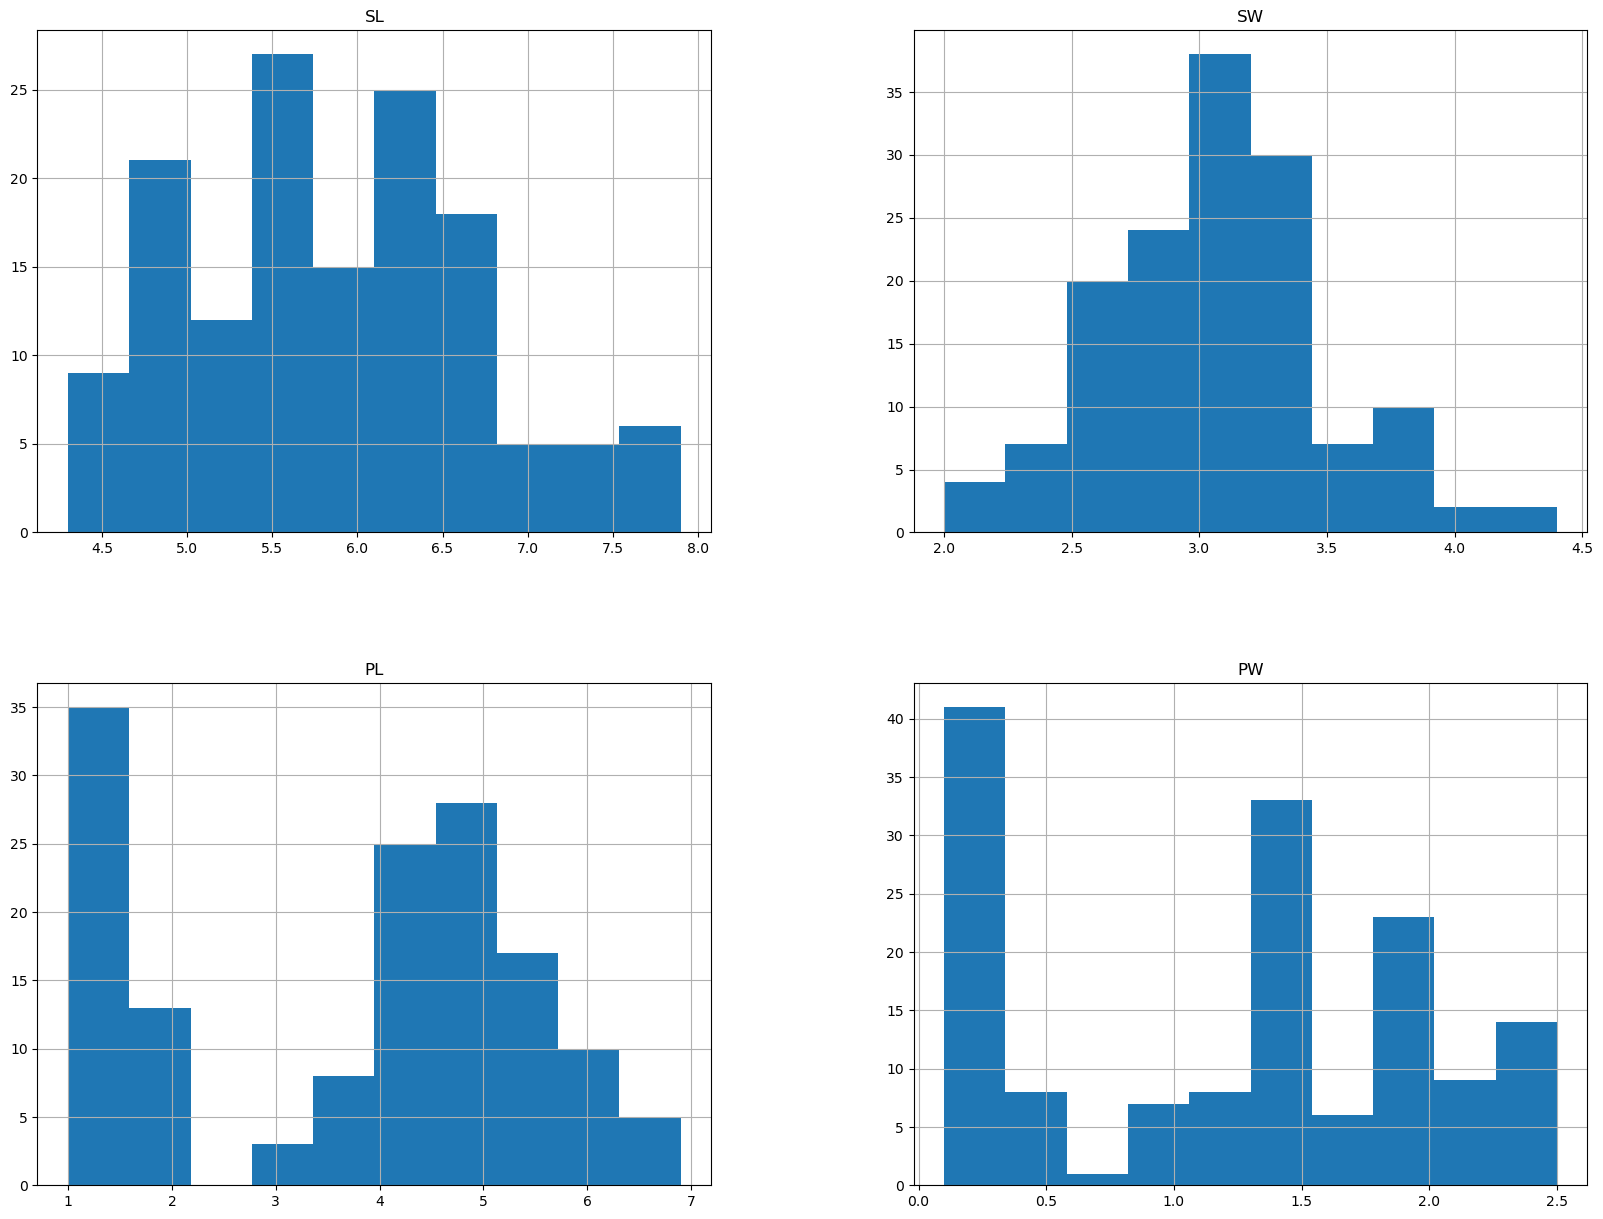

In [12]:
freqgraph=data.select_dtypes(include=['float'])
freqgraph.hist(figsize=(20,15))
plt.show()

In [10]:
for col in['SL', 'SW', 'PL']:
    data[col]=data[col].fillna(data[col].median())

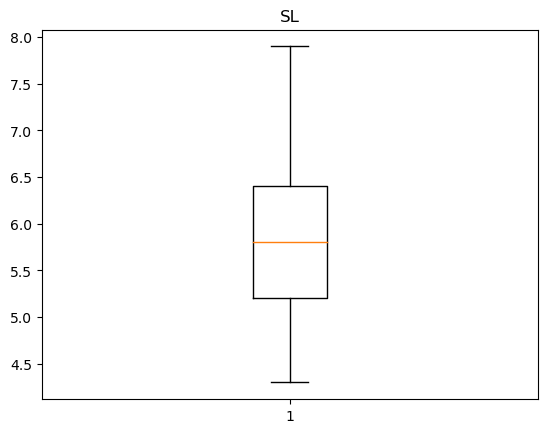

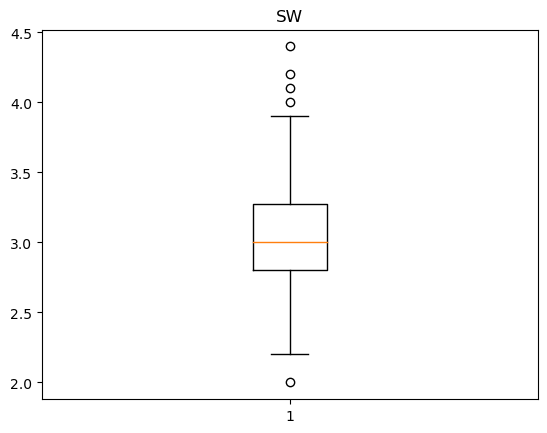

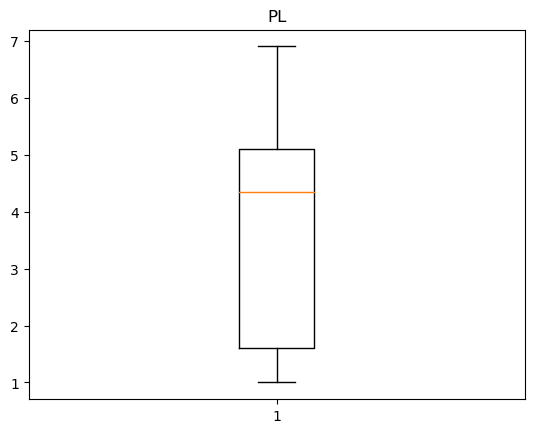

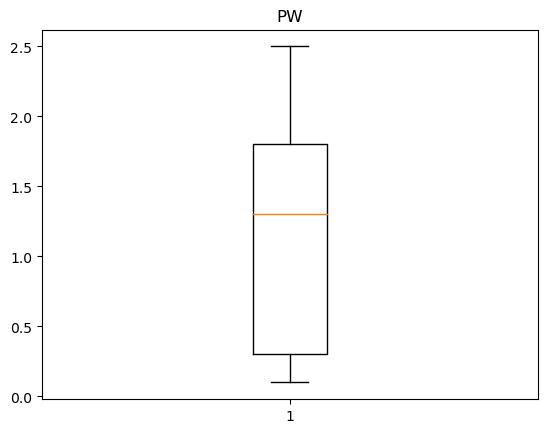

In [11]:
for i in['SL', 'SW', 'PL', 'PW']:
    plt.figure()
    
    plt.boxplot(data[i])
    plt.title(i)
    

In [12]:
Q1=np.percentile(data['SW'],25,interpolation='midpoint')
Q2=np.percentile(data['SW'],50,interpolation='midpoint')
Q3=np.percentile(data['SW'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

2.8
3.0
3.25


In [13]:
IQR=Q3-Q1
low_limit=Q1-1.5*IQR
up_limit=Q3+1.5*IQR

In [15]:
outlier=[]
for x in data['SW']:
    if((x>up_limit) or (x<low_limit)):
     outlier.append(x)

In [16]:
outlier

[4.0, 4.4, 4.1, 4.2, 2.0]

In [17]:
ind1=data['SW']<low_limit
data.loc[ind1].index

Int64Index([60], dtype='int64')

In [18]:
ind1=data['SW']>up_limit
data.loc[ind1].index

Int64Index([14, 15, 32, 33], dtype='int64')

In [19]:
data.drop([14,15,32,33,60],inplace=True)

In [20]:
data.loc[ind1]

,SL,SW,PL,PW,Classification


In [23]:
data['Classification'].nunique()

3

# Label Encoding

In [21]:
num_data=data.select_dtypes(include=['int64','float64'])
num_data

,SL,SW,PL,PW
0,5.1,3.5,1.40,0.2
1,4.9,3.0,1.40,0.2
2,5.8,3.2,1.30,0.2
3,4.6,3.1,1.50,0.2
4,5.0,3.6,1.40,0.2
...,...,...,...,...
145,6.7,3.0,5.20,2.3
146,6.3,2.5,5.00,1.9
147,6.5,3.0,4.35,2.0
148,6.2,3.4,5.40,2.3


In [22]:
cat_data=data.select_dtypes(include=['object'])
cat_data

,Classification
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
...,...
145,Iris-virginica
146,Iris-virginica
147,Iris-virginica
148,Iris-virginica


In [23]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [24]:
org_data=data.copy()

In [25]:
le=LabelEncoder()
data['Classification']=le.fit_transform(data['Classification'])
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,5.8,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [26]:
x=data.drop(['Classification'],axis=1)
y=data['Classification']



In [27]:
x.head()

,SL,SW,PL,PW
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,5.8,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [28]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Classification, dtype: int64

# LogisticRegression

In [29]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)


In [30]:
from sklearn.linear_model import LogisticRegression
log_model=LogisticRegression()
log_model=log_model.fit(x_train,y_train)
y_pred=log_model.predict(x_test)
y_pred


/Users/hzpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([1, 2, 0, 0, 0, 2, 2, 2, 1, 0, 0, 1, 2, 2, 1, 0, 2, 2, 2, 1, 1, 2,
       0, 1, 0, 0, 1, 1, 2])

In [31]:
y_test

74     1
145    2
29     0
21     0
46     0
122    2
131    2
113    2
89     1
20     0
12     0
59     1
133    2
83     1
78     1
40     0
117    2
138    2
105    2
106    2
99     1
141    2
11     0
71     1
35     0
49     0
55     1
81     1
116    2
Name: Classification, dtype: int64

In [32]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [33]:
confusion_matrix(y_test,y_pred)

array([[ 9,  0,  0],
       [ 0,  8,  1],
       [ 0,  1, 10]])

In [34]:
print('Accuracy=',accuracy_score(y_test,y_pred))
#print('precision=',precision_score(y_test,y_pred))
#print('recall=',recall_score(y_test,y_pred))
#print('F1_score=',f1_score(y_test,y_pred))

Accuracy= 0.9310344827586207


# KNN

In [35]:
from sklearn.neighbors import KNeighborsClassifier

In [36]:
metric_k=[]
neighbors= np.arange(3,15)

In [37]:
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    classifier.fit(x_train,y_train)
    y_predictions=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_predictions)
    metric_k.append(acc)

/Users/hzpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/hzpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer b

In [38]:
metric_k

[0.9310344827586207,
 0.9310344827586207,
 0.9310344827586207,
 0.9310344827586207,
 0.9310344827586207,
 0.896551724137931,
 0.9310344827586207,
 0.9310344827586207,
 0.9310344827586207,
 0.9310344827586207,
 0.9310344827586207,
 0.8620689655172413]

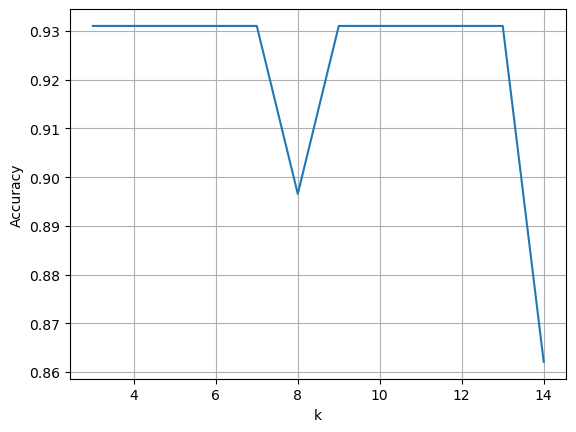

In [39]:
plt.plot(neighbors,metric_k)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.grid()

In [40]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
classifier = KNeighborsClassifier(n_neighbors=5,metric='euclidean')
classifier.fit(x_train,y_train)
y_predictions=classifier.predict(x_test)
acc=accuracy_score(y_test,y_predictions)
metric_k.append(acc)

/Users/hzpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [41]:
y_predictions

array([1, 2, 0, 0, 0, 2, 2, 2, 1, 0, 0, 1, 2, 2, 1, 0, 2, 2, 2, 1, 1, 2,
       0, 1, 0, 0, 1, 1, 2])

In [42]:
print('Accuracy=',accuracy_score(y_test,y_predictions))
#print('precision=',precision_score(y_test,y_predictions))
#print('recall=',recall_score(y_test,y_predictions))
#print('F1_score=',f1_score(y_test,y_predictions))
#confusion_matrix(y_test,y_predictions)

Accuracy= 0.9310344827586207


# SVM

In [43]:
from sklearn.svm import SVC

In [44]:
svm_cls= SVC(kernel= 'linear')
svm_cls= svm_cls.fit(x_train,y_train)
y_pred_svm= svm_cls.predict(x_test)

In [45]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [46]:
confusion_matrix(y_test,y_pred_svm)

array([[9, 0, 0],
       [0, 8, 1],
       [0, 2, 9]])

In [47]:
accuracy_score(y_test,y_pred_svm)

0.896551724137931

In [ ]:
##Rbf model

In [48]:
svm_cls1= SVC(kernel= 'rbf')
svm_cls1= svm_cls1.fit(x_train,y_train)
y_pred_svm1= svm_cls1.predict(x_test)

In [49]:
confusion_matrix(y_test,y_pred_svm1)

array([[9, 0, 0],
       [0, 8, 1],
       [0, 3, 8]])

In [50]:
accuracy_score(y_test,y_pred_svm1)

0.8620689655172413

# DecisionTreeClassifier

In [51]:
from sklearn.tree import DecisionTreeClassifier
dt_cls=DecisionTreeClassifier()
dt_cls=dt_cls.fit(x_train,y_train)
y_pred_dt= dt_cls.predict(x_test)

In [52]:
confusion_matrix(y_test,y_pred_dt)

array([[9, 0, 0],
       [0, 8, 1],
       [0, 2, 9]])

In [53]:
accuracy_score(y_test,y_pred_dt)

0.896551724137931

# Random Forest

In [54]:
from sklearn.ensemble import RandomForestClassifier
rf_cls=RandomForestClassifier()
rf_cls=rf_cls.fit(x_train,y_train)
y_pred_rf=rf_cls.predict(x_test)


In [55]:
confusion_matrix(y_test,y_pred_rf)

array([[ 9,  0,  0],
       [ 0,  8,  1],
       [ 0,  1, 10]])

In [56]:
accuracy_score(y_test,y_pred_rf)

0.9310344827586207

# Conclusion
By analysing the accuracy score of all the above models Logistic regression,KNN,Random forest gives the best accuracy score.